# Human Factors Prediction Model => LSTM(ASRS+NTSB)

## Import Notebook

In [8]:
%run notebook_model_ls.ipynb
%run notebook_model_lstm.ipynb

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/lasanthalakmal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lasanthalakmal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/lasanthalakmal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lasanthalakmal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
from sklearn.metrics import f1_score, accuracy_score, hamming_loss

def show_accuracy(model):

    y_true = model.Y_test
    y_pred = model.Y_pred

    accuracy = accuracy_score(y_true, y_pred)

    # code adapted from (F1_Score, n.d.)
    macro_f1_score = f1_score(y_true, y_pred, average='macro')
    micro_f1_score = f1_score(y_true, y_pred, average='micro')
    weighted_f1_score = f1_score(y_true, y_pred, average='weighted')
    # end of adapted code

    hamming_loss_value = hamming_loss(y_true, y_pred)

    print(f'Accuracy: {(accuracy*100):.2f}')
    print(f'Micro F1 Score: {(micro_f1_score*100):.2f}')
    print(f'Macro F1 Score: {(macro_f1_score*100):.2f}')
    print(f'Weighted F1 Score: {(weighted_f1_score*100):.2f}')
    print(f'Hamming Loss: {hamming_loss_value:.4f}')

def show_report(model):
    print(model.classification_report)

In [10]:
# 01. Get Data
asrs_df = CoreUtils.get_data('asrs', from_year=2023, to_year=2023)
# asrs_df.sort_values(by='date', ascending=False, inplace=True)
# asrs_df = asrs_df.head(500)

ntsb_df = CoreUtils.get_data('ntsb', from_year=2018, to_year=2023)
# ntsb_df.sort_values(by='date', ascending=False, inplace=True)
# ntsb_df = ntsb_df.head(500)

df =  pd.concat([asrs_df, ntsb_df], axis=0).reset_index(drop=True)
df.sort_values(by='date', inplace=True)

ls_version = 2 # Default version=2
ls_name = 'asrs_ntsb'
ds_name='asrs_ntsb'

In [11]:
def call_modal(options):
    dfs = { ds_name: df.copy() }
    model = LSTMModel(dfs, ds_name=ds_name, options=options)
    model.train()

    # 03. Evaluate Model
    evaluate_result = model.evaluate()
    return model

## LSTM(ASRS+NTSB) + LS(Hybrid)

Start labelling
Model and vectorizer loaded successfully
LS sample_size==== 0
Factors Null count 0
Ladled Sampling size= (8891, 7)
start pre_process_df
combined_narrative
clean_feature
drop_narratives
preprocess_narrative
event_id                        0
date                            0
finding_factor                  0
finding_description             0
HFACS_Category_Value_Predict    0
narrative                       0
narrative_length                0
narrative_word_count            0
narrative_sentence_count        0
dtype: int64
Pre processed


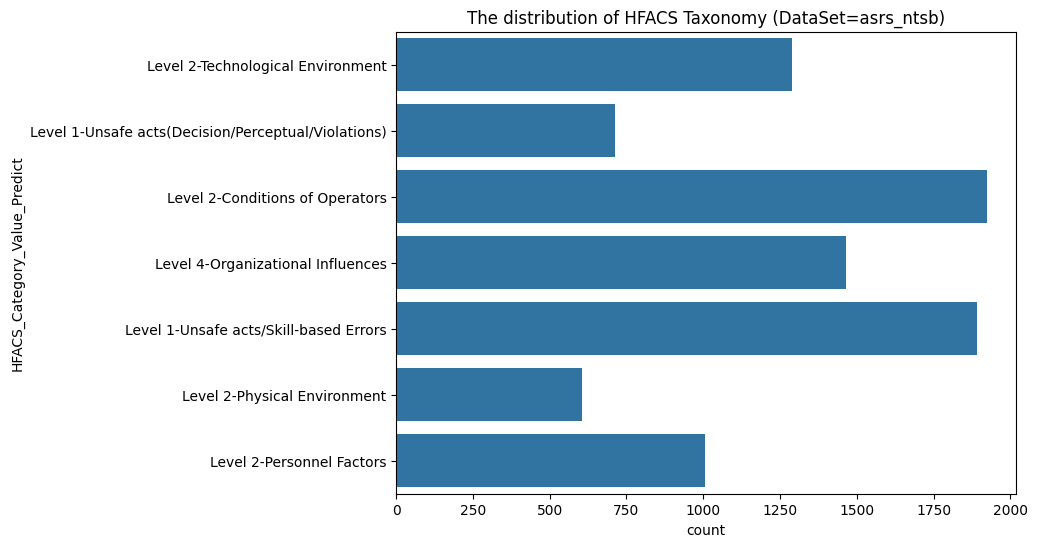

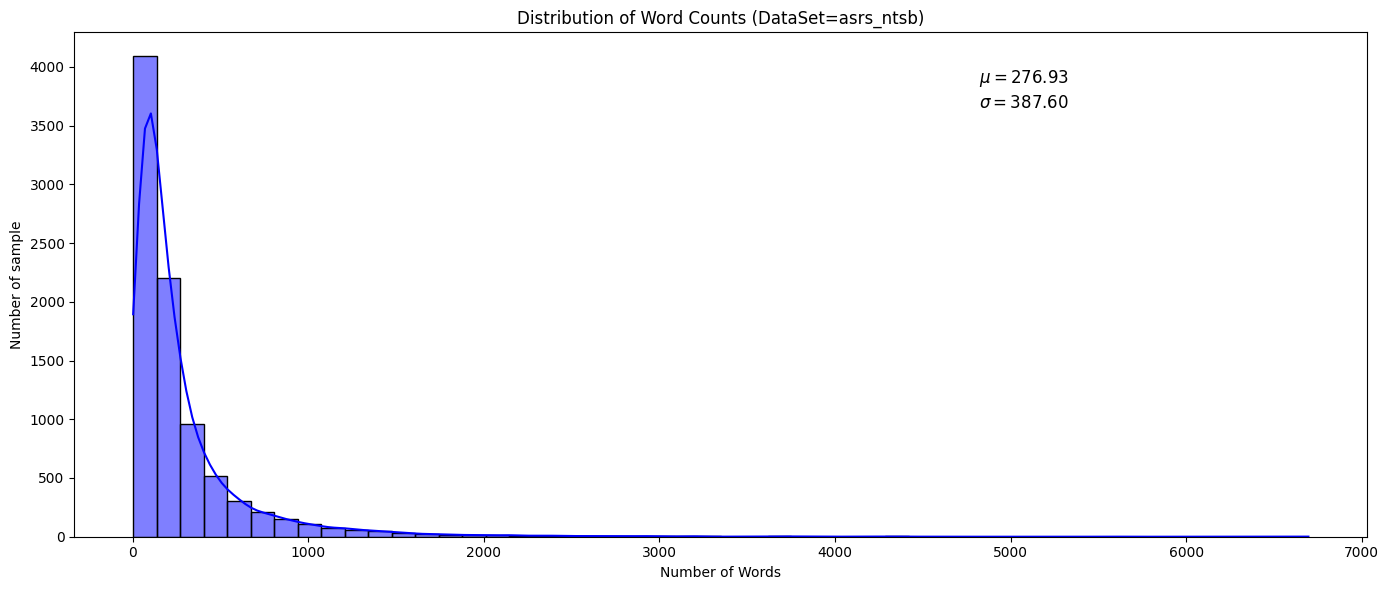

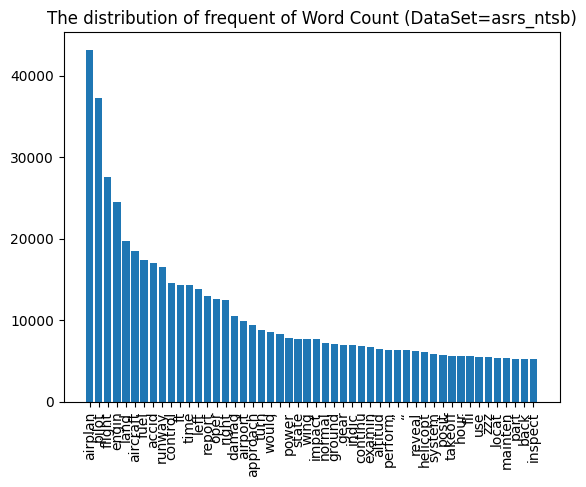

Total unique words: 58463
Define Y
Shape of label tensor: (8891,)
Define X
Found 58464 unique tokens.
Shape of data tensor: (8891, 300)
(7112, 300) (7112,)
(1779, 300) (1779,)
Counter({1: 1526, 2: 1523, 6: 1151, 5: 1036, 3: 812, 0: 567, 4: 497})
Counter({1: 1526, 2: 1523, 6: 1151, 5: 1036, 3: 812, 0: 567, 4: 497})
Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 79s 374ms/step - accuracy: 0.1989 - loss: 1.9343 - val_accuracy: 0.2739 - val_loss: 1.8808
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 73s 365ms/step - accuracy: 0.2550 - loss: 1.8564 - val_accuracy: 0.3638 - val_loss: 1.6692
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 76s 382ms/step - accuracy: 0.3588 - loss: 1.6353 - val_accuracy: 0.3666 - val_loss: 1.6067
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 77s 381ms/step - accuracy: 0.3724 - loss: 1.5912 - val_accuracy: 0.3736 - val_loss: 1.5765
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 73s 366ms/step - accuracy: 0.4063 - loss: 1.5266 - val_accuracy: 0.3806 - val_loss: 1.5605
Epoch 6/10
200/200 ━━━━━━━━━━

/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metric

278/278 ━━━━━━━━━━━━━━━━━━━━ 33s 118ms/step


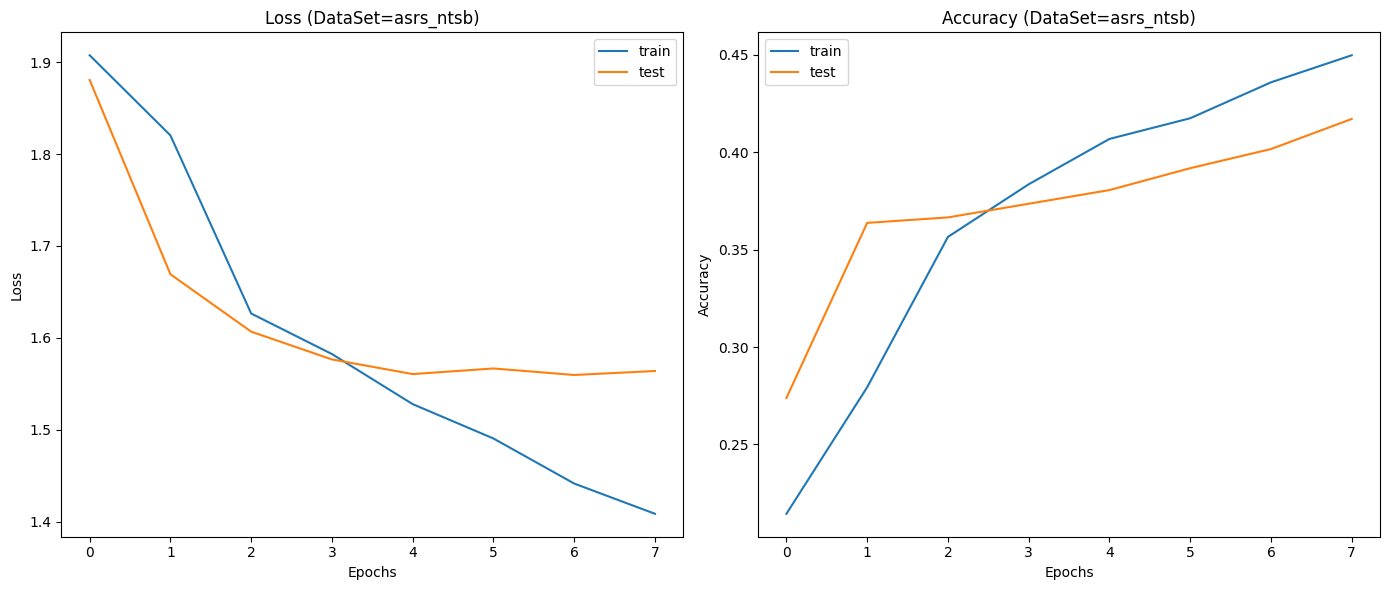

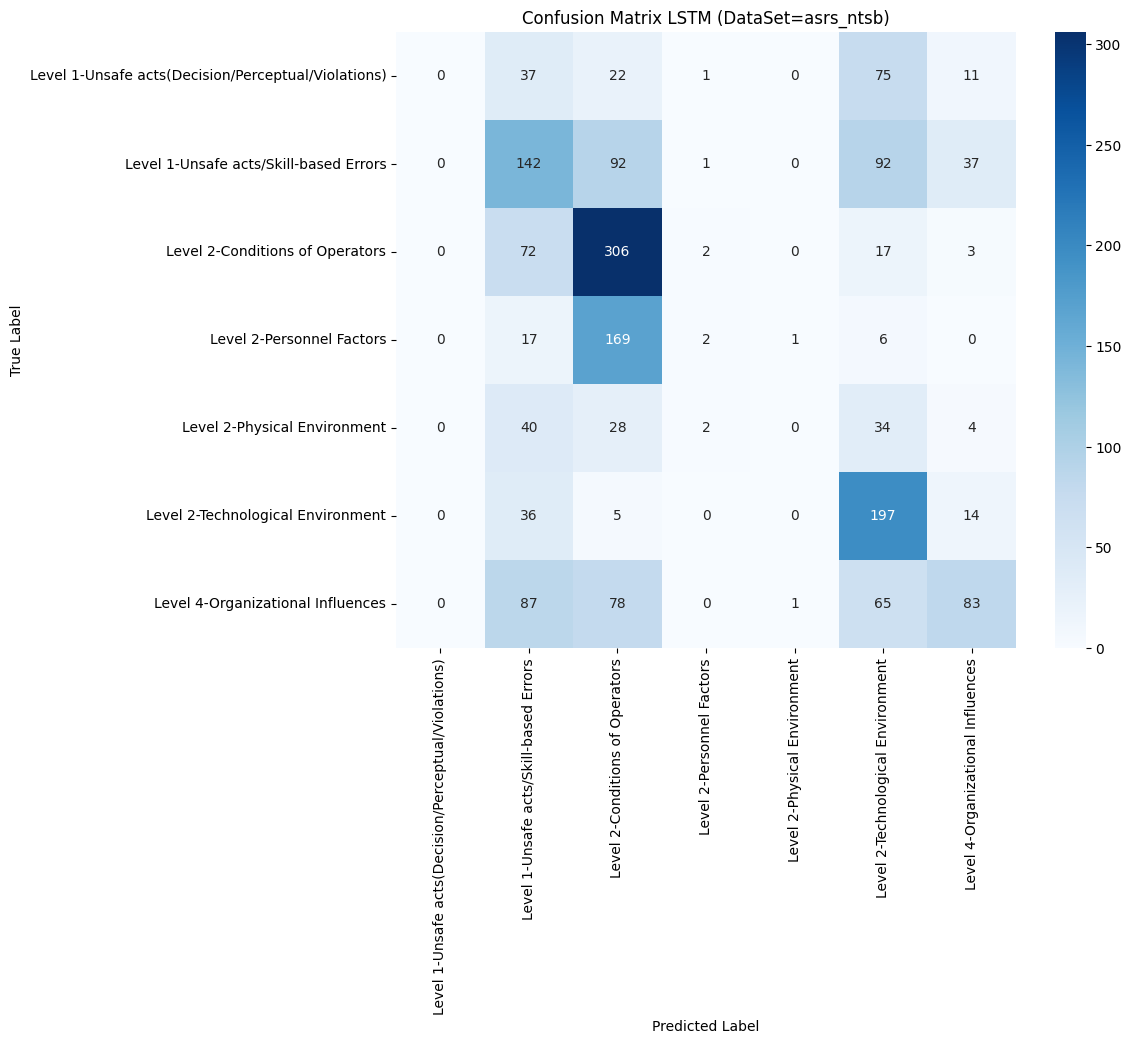

In [12]:
options = {
    "sample_size": 0, 
    "max_length": 300, 
    "max_nb_words": 50000, 
    "is_enable_smote": False,
    "is_enable_asasyn": False,
    "is_enable_class_weight": False,
    "ls_name": ls_name,
    "ls_version": ls_version
}

# 02. Train Model
lstm_model = call_modal(options)

## LSTM(ASRS+NTSB) + LS(Hybrid) + Class Weight

Start labelling
Model and vectorizer loaded successfully
LS sample_size==== 0
Factors Null count 0
Ladled Sampling size= (8891, 7)
start pre_process_df
combined_narrative
clean_feature
drop_narratives
preprocess_narrative
event_id                        0
date                            0
finding_factor                  0
finding_description             0
HFACS_Category_Value_Predict    0
narrative                       0
narrative_length                0
narrative_word_count            0
narrative_sentence_count        0
dtype: int64
Pre processed


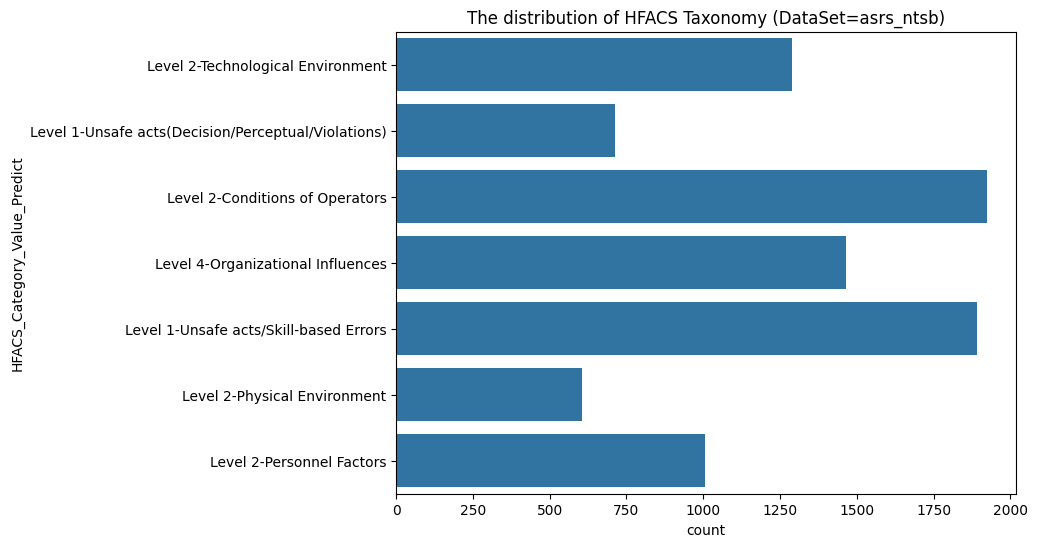

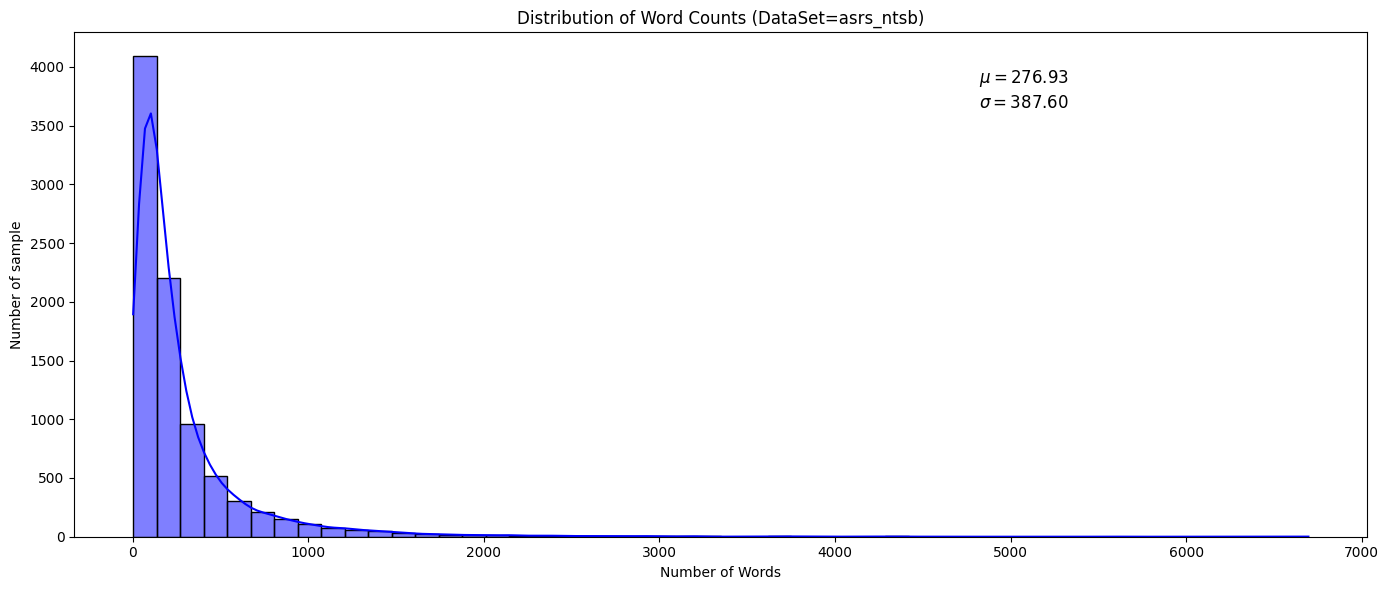

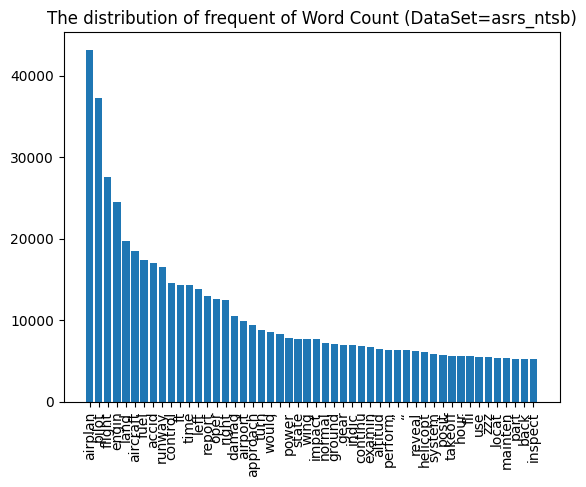

Total unique words: 58463
Define Y
Shape of label tensor: (8891,)
Define X
Found 58464 unique tokens.
Shape of data tensor: (8891, 300)
(7112, 300) (7112,)
(1779, 300) (1779,)
Counter({1: 1526, 2: 1523, 6: 1151, 5: 1036, 3: 812, 0: 567, 4: 497})
Counter({1: 1526, 2: 1523, 6: 1151, 5: 1036, 3: 812, 0: 567, 4: 497})
{0: 1.7918871252204585, 1: 0.6657929226736566, 2: 0.6671043992120814, 3: 1.251231527093596, 4: 2.0442655935613683, 5: 0.9806949806949807, 6: 0.8827106863596872}
Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 78s 369ms/step - accuracy: 0.1747 - loss: 1.9539 - val_accuracy: 0.2992 - val_loss: 1.9360
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 71s 357ms/step - accuracy: 0.2970 - loss: 1.8012 - val_accuracy: 0.2542 - val_loss: 1.6847
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 71s 357ms/step - accuracy: 0.2746 - loss: 1.6856 - val_accuracy: 0.3315 - val_loss: 1.6523
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 73s 363ms/step - accuracy: 0.3021 - loss: 1.6784 - val_accuracy: 0.3371 - val_loss: 1.6496

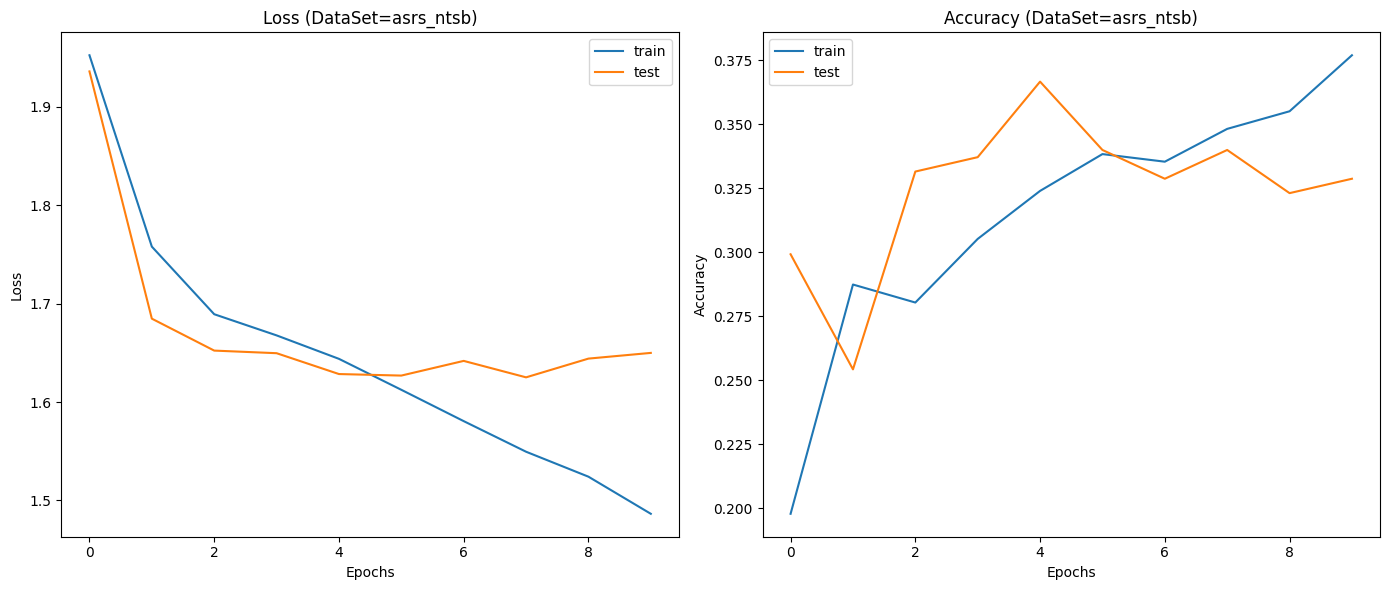

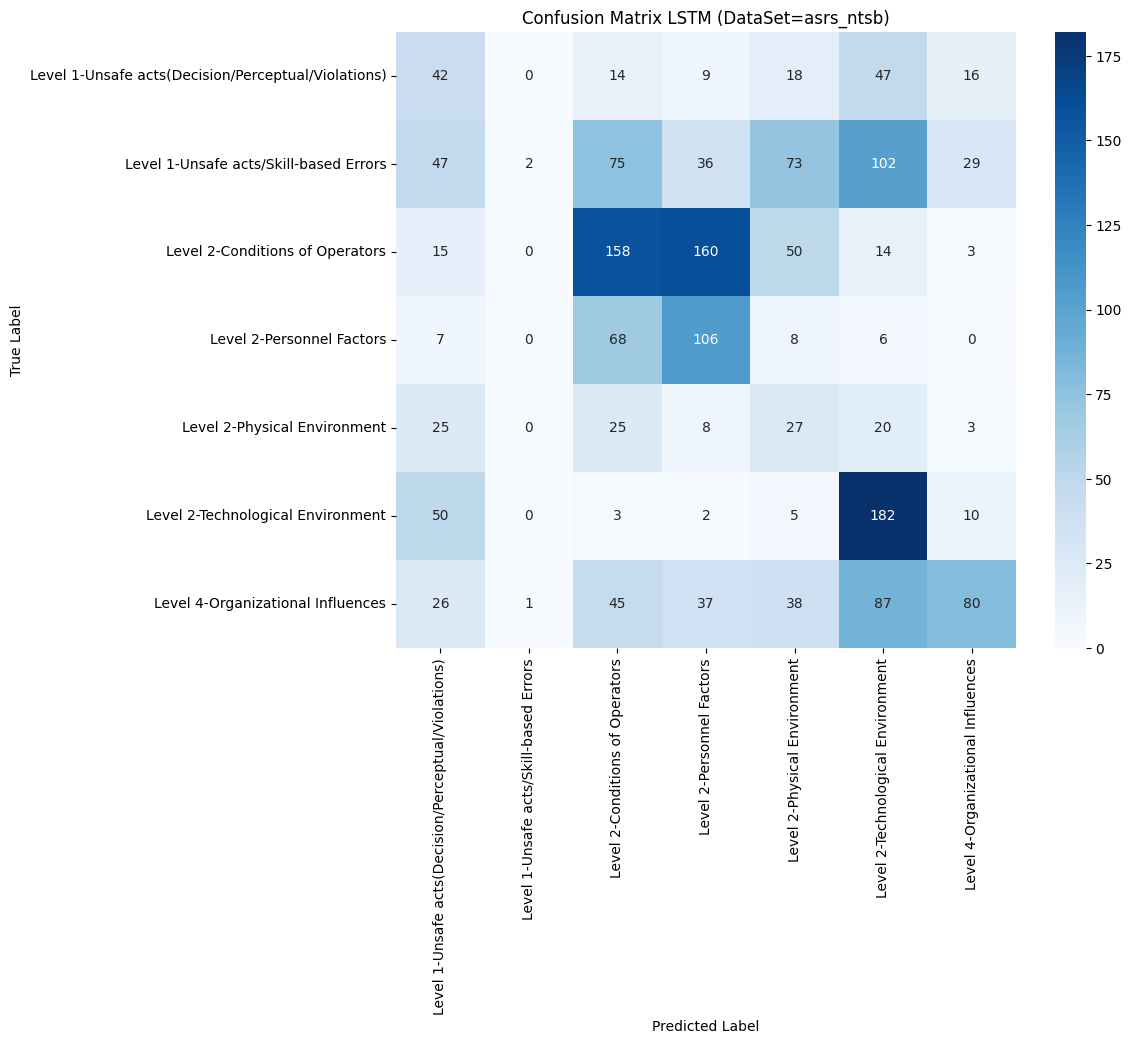

In [13]:
options = {
    "sample_size": 0, 
    "max_length": 300, 
    "max_nb_words": 50000, 
    "is_enable_smote": False,
    "is_enable_asasyn": False,
    "is_enable_class_weight": True,
    "ls_name": ls_name,
    "ls_version": ls_version
}

# 02. Train Model
lstm_model_weight = call_modal(options)

## LSTM(ASRS+NTSB) + LS(Hybrid) + SMOTE

Start labelling
Model and vectorizer loaded successfully
LS sample_size==== 0
Factors Null count 0
Ladled Sampling size= (8891, 7)
start pre_process_df
combined_narrative
clean_feature
drop_narratives
preprocess_narrative
event_id                        0
date                            0
finding_factor                  0
finding_description             0
HFACS_Category_Value_Predict    0
narrative                       0
narrative_length                0
narrative_word_count            0
narrative_sentence_count        0
dtype: int64
Pre processed


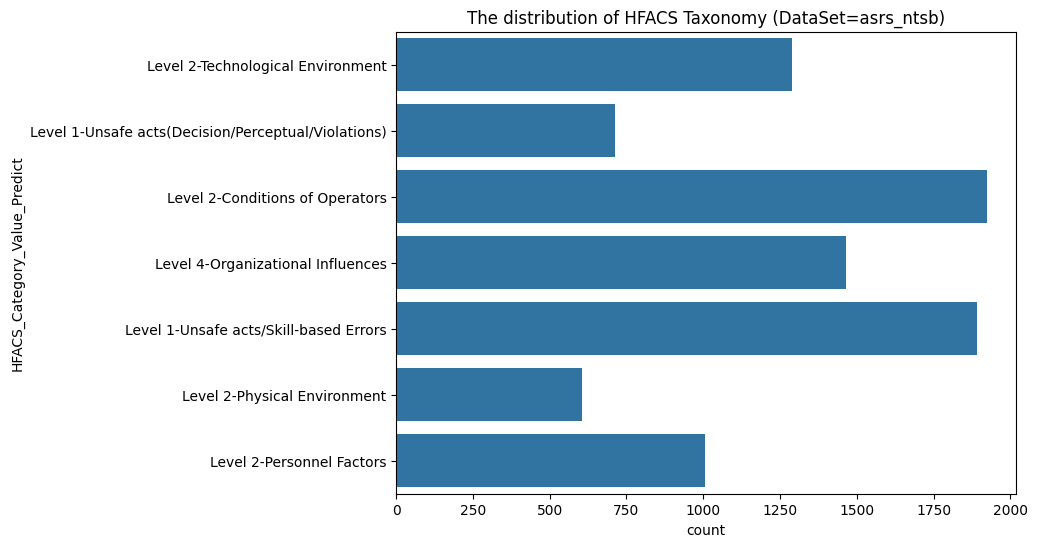

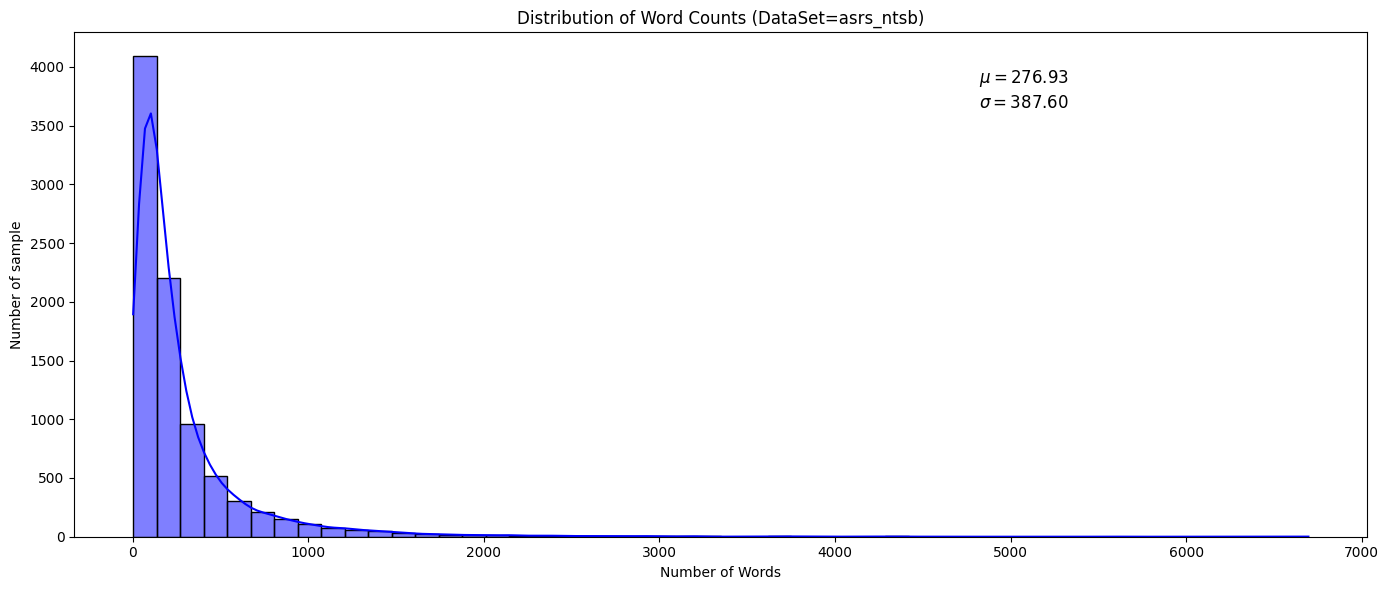

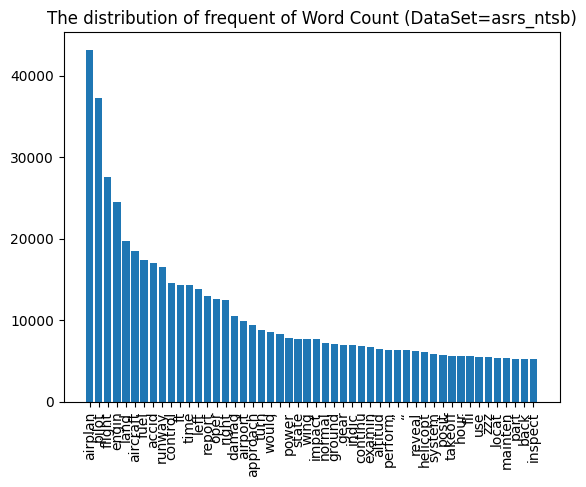

Total unique words: 58463
Define Y
Shape of label tensor: (8891,)
Define X
Found 58464 unique tokens.
Shape of data tensor: (8891, 300)
(7112, 300) (7112,)
(1779, 300) (1779,)
Counter({1: 1526, 2: 1523, 6: 1151, 5: 1036, 3: 812, 0: 567, 4: 497})
Original dataset shape: (7112, 300)
Resampled dataset shape: (10682, 300)
Counter({2: 1526, 1: 1526, 5: 1526, 6: 1526, 3: 1526, 0: 1526, 4: 1526})
Epoch 1/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 122s 390ms/step - accuracy: 0.1710 - loss: 1.9458 - val_accuracy: 0.0533 - val_loss: 2.6079
Epoch 2/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 119s 397ms/step - accuracy: 0.2715 - loss: 1.7347 - val_accuracy: 0.0767 - val_loss: 2.4885
Epoch 3/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 120s 398ms/step - accuracy: 0.3195 - loss: 1.6647 - val_accuracy: 0.1141 - val_loss: 2.7369
Epoch 4/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 131s 436ms/step - accuracy: 0.3394 - loss: 1.6084 - val_accuracy: 0.0271 - val_loss: 3.1859
Epoch 5/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 125s 416ms/step - accuracy: 0.3619 - lo

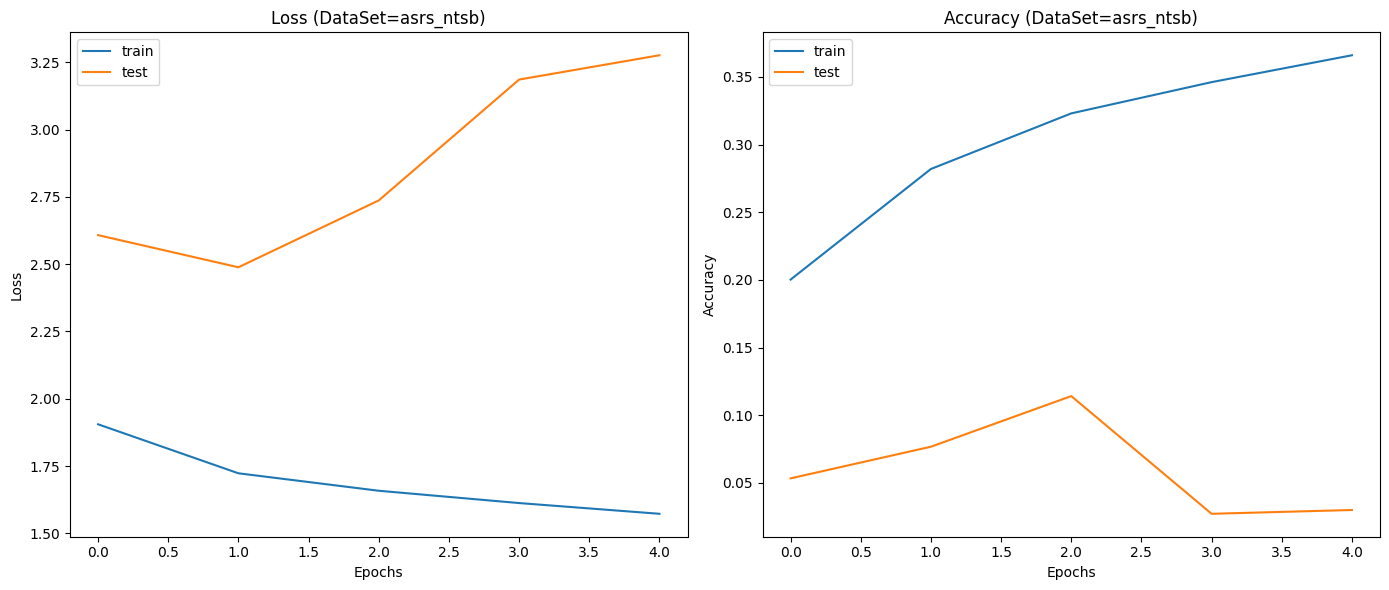

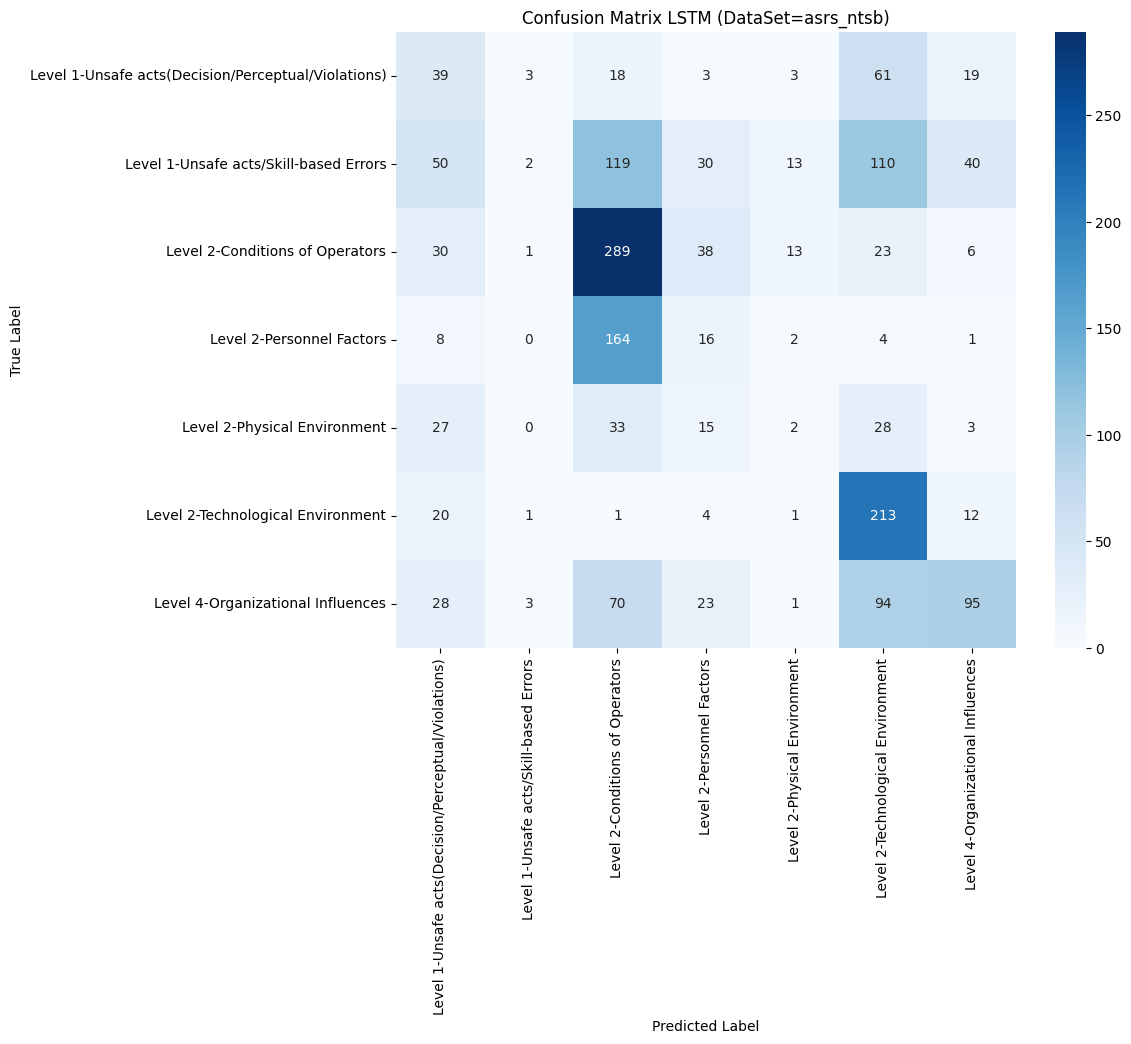

In [14]:
options = {
    "sample_size": 0, 
    "max_length": 300, 
    "max_nb_words": 50000, 
    "is_enable_smote": True,
    "is_enable_asasyn": False,
    "is_enable_class_weight": False,
    "ls_name": ls_name,
    "ls_version": ls_version
}

# 02. Train Model
lstm_model_smote = call_modal(options)

## LSTM(ASRS+NTSB) + LS(Hybrid) + ASASYN

Start labelling
Model and vectorizer loaded successfully
LS sample_size==== 0
Factors Null count 0
Ladled Sampling size= (8891, 7)
start pre_process_df
combined_narrative
clean_feature
drop_narratives
preprocess_narrative
event_id                        0
date                            0
finding_factor                  0
finding_description             0
HFACS_Category_Value_Predict    0
narrative                       0
narrative_length                0
narrative_word_count            0
narrative_sentence_count        0
dtype: int64
Pre processed


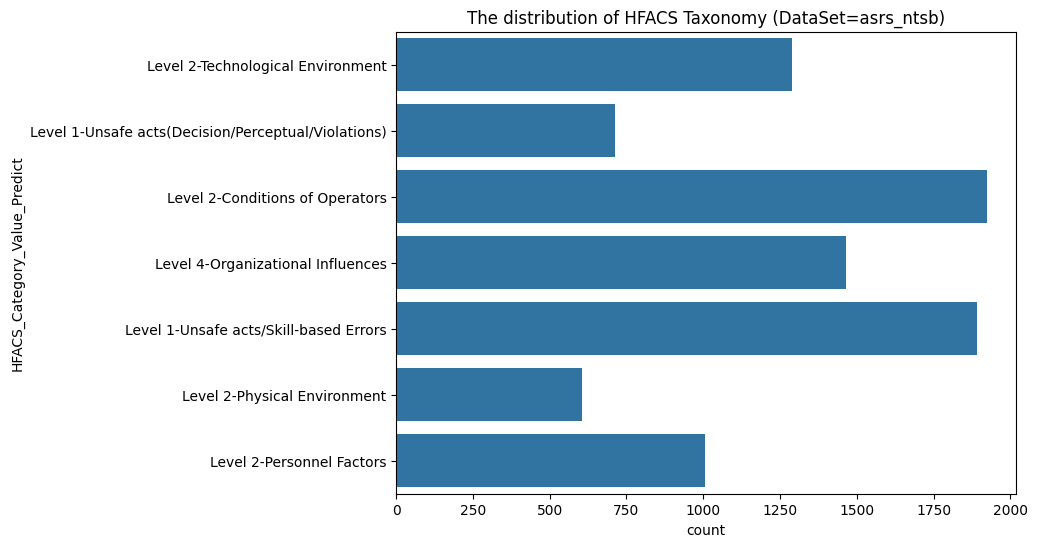

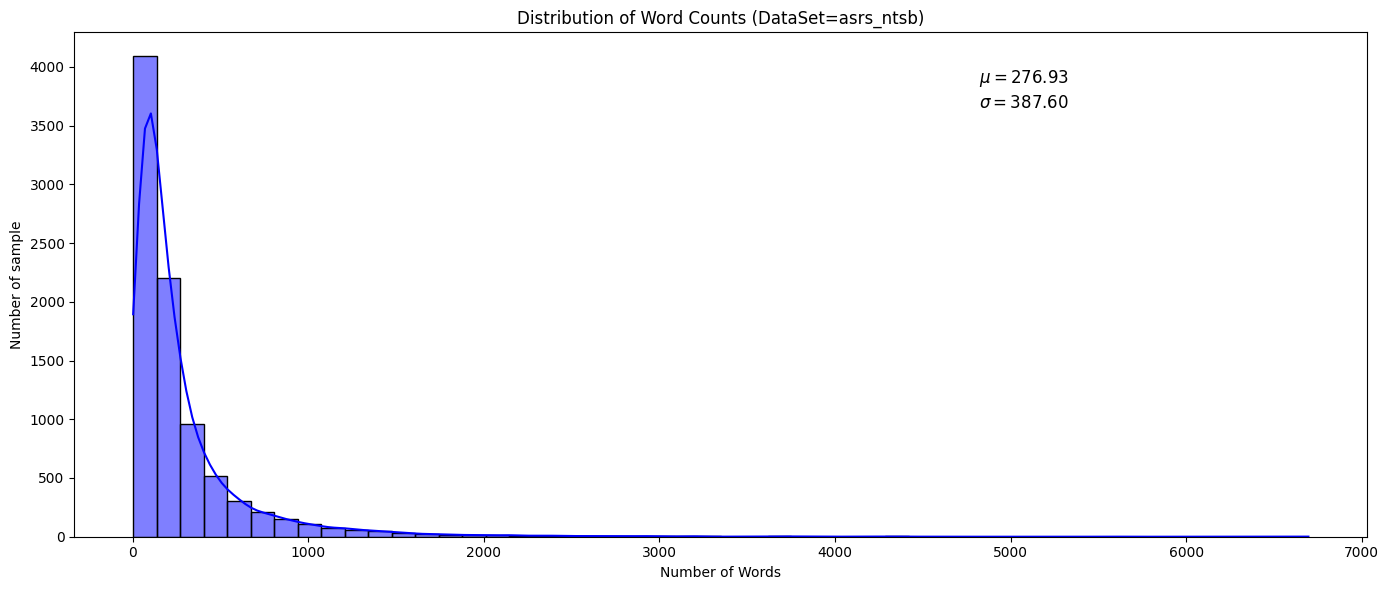

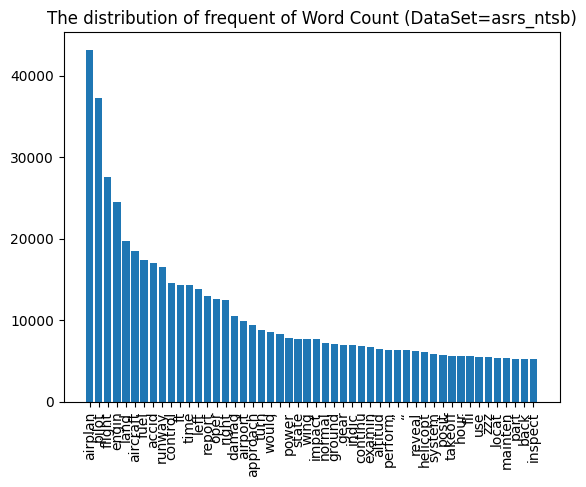

Total unique words: 58463
Define Y
Shape of label tensor: (8891,)
Define X
Found 58464 unique tokens.
Shape of data tensor: (8891, 300)
(7112, 300) (7112,)
(1779, 300) (1779,)
Counter({1: 1526, 2: 1523, 6: 1151, 5: 1036, 3: 812, 0: 567, 4: 497})
Original dataset shape: (7112, 300)
Resampled dataset shape: (8090, 300)
Counter({1: 1526, 2: 1523, 4: 1475, 6: 1151, 5: 1036, 3: 812, 0: 567})
Epoch 1/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 89s 373ms/step - accuracy: 0.2255 - loss: 1.9361 - val_accuracy: 0.0000e+00 - val_loss: 2.2401
Epoch 2/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 94s 411ms/step - accuracy: 0.2725 - loss: 1.8217 - val_accuracy: 0.0000e+00 - val_loss: 2.3887
Epoch 3/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 99s 433ms/step - accuracy: 0.3491 - loss: 1.6302 - val_accuracy: 0.0000e+00 - val_loss: 2.2026
Epoch 4/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 99s 436ms/step - accuracy: 0.3681 - loss: 1.5931 - val_accuracy: 0.0012 - val_loss: 2.1224
Epoch 5/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 96s 422ms/step - accuracy: 0.4035 

/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metric

278/278 ━━━━━━━━━━━━━━━━━━━━ 33s 120ms/step


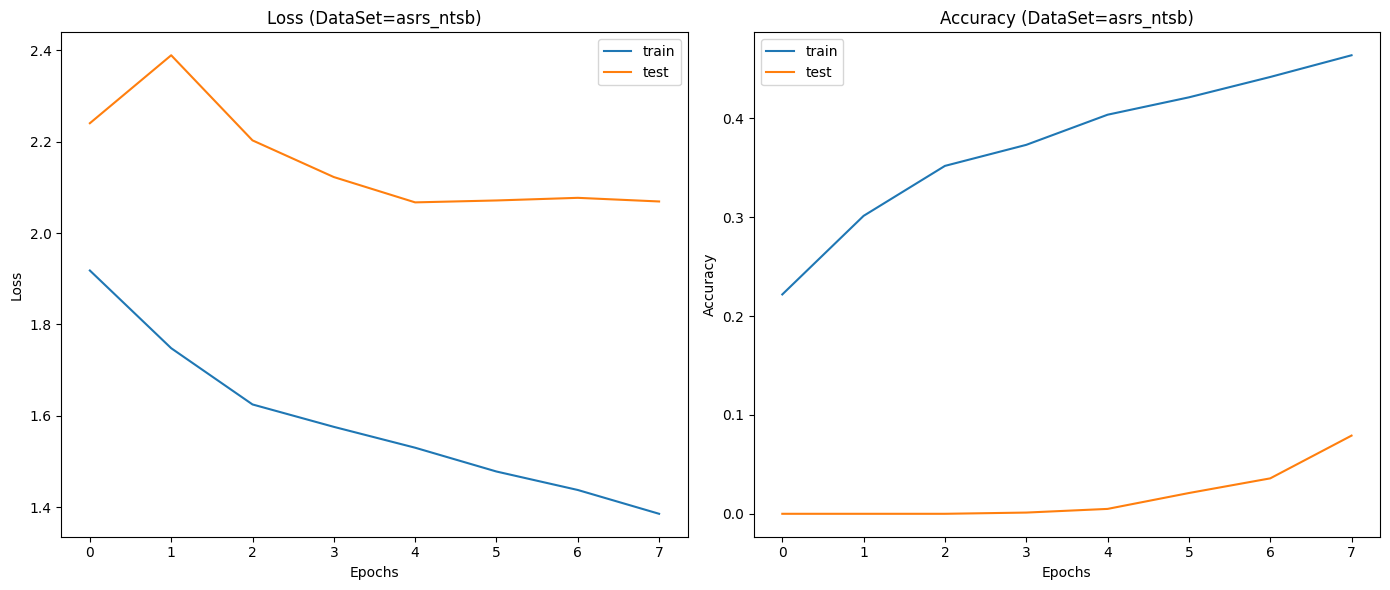

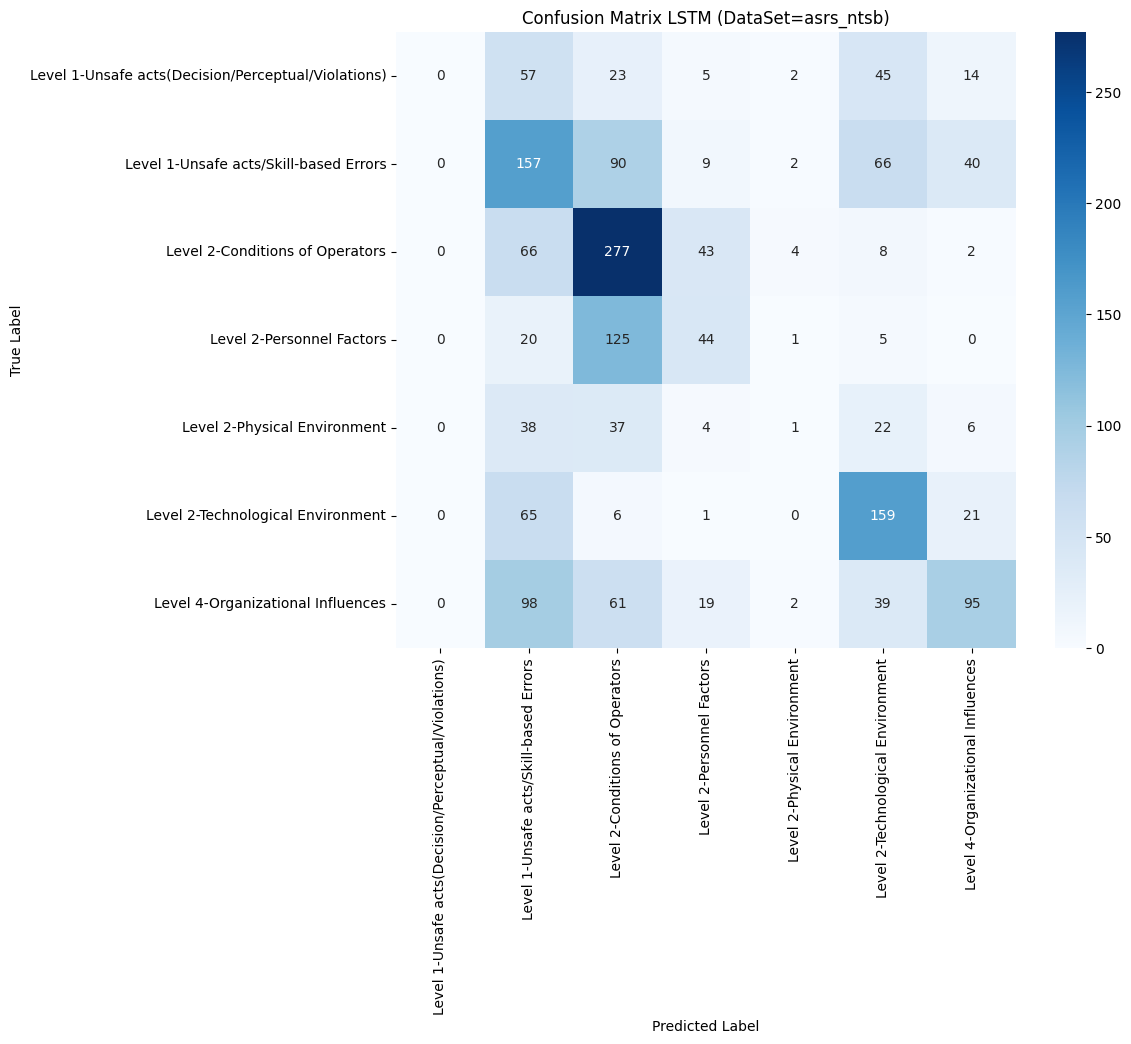

In [15]:
options = {
    "sample_size": 0, 
    "max_length": 300, 
    "max_nb_words": 50000, 
    "is_enable_smote": False,
    "is_enable_asasyn": True,
    "is_enable_class_weight": False,
    "ls_name": ls_name,
    "ls_version": ls_version
}

# 02. Train Model
lstm_model_asasyn = call_modal(options)

## Summary of Accuracy

In [16]:
# Show Accuracy
print('ASRS+LS(Hybrid)=========')
show_accuracy(lstm_model)
print('ASRS+LS(Hybrid)+Class Imbalance=========')
show_accuracy(lstm_model_weight)
print('ASRS+LS(Hybrid)+SMOTE=========')
show_accuracy(lstm_model_smote)
print('ASRS+LS(Hybrid)+ASAYN=========')
show_accuracy(lstm_model_asasyn)

ASRS+LS(Hybrid)=========
Accuracy: 41.03
Micro F1 Score: 41.03
Macro F1 Score: 26.05
Weighted F1 Score: 33.88
Hamming Loss: 0.5897
ASRS+LS(Hybrid)+Class Imbalance=========
Accuracy: 33.56
Micro F1 Score: 33.56
Macro F1 Score: 29.42
Weighted F1 Score: 29.84
Hamming Loss: 0.6644
ASRS+LS(Hybrid)+SMOTE=========
Accuracy: 36.87
Micro F1 Score: 36.87
Macro F1 Score: 26.00
Weighted F1 Score: 29.72
Hamming Loss: 0.6313
ASRS+LS(Hybrid)+ASAYN=========
Accuracy: 41.20
Micro F1 Score: 41.20
Macro F1 Score: 30.26
Weighted F1 Score: 37.14
Hamming Loss: 0.5880


In [17]:
print('ASRS+LS(Hybrid)=========')
show_report(lstm_model)

ASRS+LS(Hybrid)=========
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       146
           1       0.33      0.39      0.36       364
           2       0.44      0.77      0.56       400
           3       0.25      0.01      0.02       195
           4       0.00      0.00      0.00       108
           5       0.41      0.78      0.53       252
           6       0.55      0.26      0.36       314

    accuracy                           0.41      1779
   macro avg       0.28      0.32      0.26      1779
weighted avg       0.35      0.41      0.34      1779



In [18]:
print('ASRS+LS(Hybrid)+Class Imbalance=========')
show_report(lstm_model_weight)

ASRS+LS(Hybrid)+Class Imbalance=========
              precision    recall  f1-score   support

           0       0.20      0.29      0.23       146
           1       0.67      0.01      0.01       364
           2       0.41      0.40      0.40       400
           3       0.30      0.54      0.38       195
           4       0.12      0.25      0.17       108
           5       0.40      0.72      0.51       252
           6       0.57      0.25      0.35       314

    accuracy                           0.34      1779
   macro avg       0.38      0.35      0.29      1779
weighted avg       0.44      0.34      0.30      1779



In [19]:
print('ASRS+LS(Hybrid)+SMOTE=========')
show_report(lstm_model_smote)

ASRS+LS(Hybrid)+SMOTE=========
              precision    recall  f1-score   support

           0       0.19      0.27      0.22       146
           1       0.20      0.01      0.01       364
           2       0.42      0.72      0.53       400
           3       0.12      0.08      0.10       195
           4       0.06      0.02      0.03       108
           5       0.40      0.85      0.54       252
           6       0.54      0.30      0.39       314

    accuracy                           0.37      1779
   macro avg       0.28      0.32      0.26      1779
weighted avg       0.32      0.37      0.30      1779



In [20]:
print('ASRS+LS(Hybrid)+ASAYN=========')
show_report(lstm_model_asasyn)

ASRS+LS(Hybrid)+ASAYN=========
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       146
           1       0.31      0.43      0.36       364
           2       0.45      0.69      0.54       400
           3       0.35      0.23      0.28       195
           4       0.08      0.01      0.02       108
           5       0.46      0.63      0.53       252
           6       0.53      0.30      0.39       314

    accuracy                           0.41      1779
   macro avg       0.31      0.33      0.30      1779
weighted avg       0.37      0.41      0.37      1779

